In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial
from Classifier import LeastSquares, Logistic

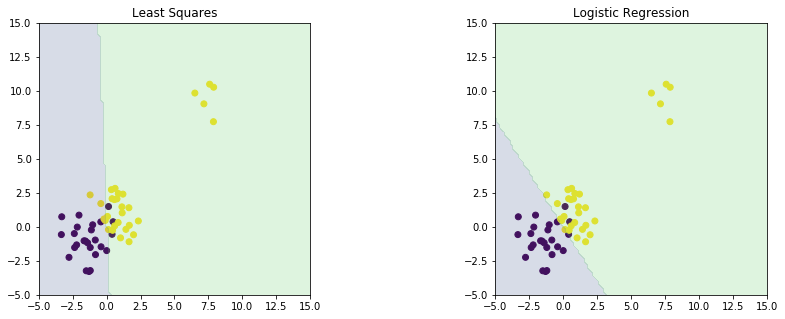

In [2]:
"""
Generate data with outliers
"""
np.random.seed(1222)
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1
x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([8., 10.])


x_train, t_train = (np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int))
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

t_ls = LeastSquares().fit(x_train, t_train).predict(x_test)
t_lr = Logistic().fit(x_train, t_train).predict(x_test)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.contourf(x1_test, x2_test, t_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.contourf(x1_test, x2_test, t_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

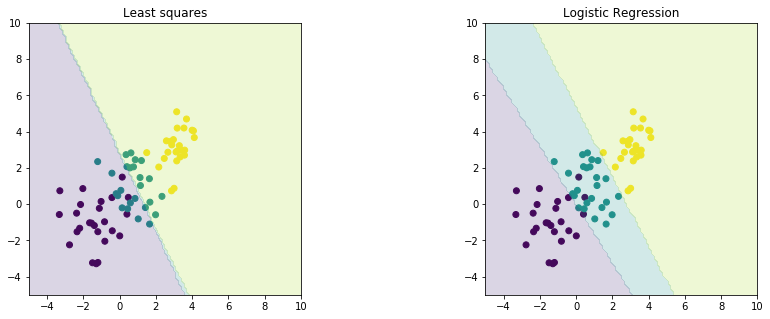

In [3]:
np.random.seed(1222)
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1
x2 = np.random.normal(size=50).reshape(-1, 2) + 3.

x_train, t_train = (np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int))
x1_test, x2_test = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

t_ls = LeastSquares().fit(x_train, t_train).predict(x_test)
t_lr = Logistic().fit(x_train, t_train, max_iter=1000, learning_rate=0.01).predict(x_test)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.contourf(x1_test, x2_test, t_ls.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.contourf(x1_test, x2_test, t_lr.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()